<a href="https://colab.research.google.com/github/TNH510/Artificial-Intelligence/blob/main/Adaptive_Food_Suggestion_Engine_by_Fuzzy_Logic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=e6d52a6a349f08d0b5ed9ab9aab83db6824085d40b50d8e7770b830f58500cab
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [64]:
import numpy as np
import skfuzzy as fuzzy
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

In [65]:
taste = ctrl.Antecedent(np.arange(0,3,0.1) , 'Taste')
enviroment = ctrl.Antecedent(np.arange(0,3,0.1) , 'Enviroment')
budget = ctrl.Antecedent(np.arange(0,9,0.1) , 'Budget')
review = ctrl.Antecedent(np.arange(0,3,0.1), 'Review') 
location = ctrl.Antecedent(np.arange(0,3,0.1), 'Location') 
level = ctrl.Consequent(np.arange(0,9,0.1), 'Level') 

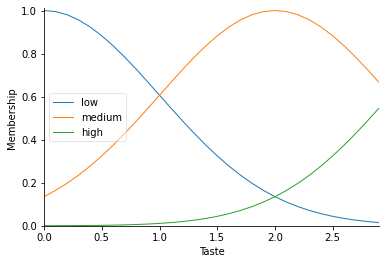

In [66]:
taste['low'] = fuzzy.gaussmf(taste.universe,0,1)
taste['medium'] = fuzzy.gaussmf(taste.universe,2,1)
taste['high'] = fuzzy.gaussmf(taste.universe,4,1)
taste.view()

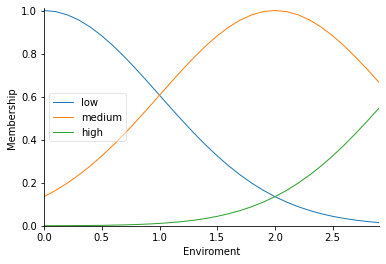

In [67]:
enviroment['low'] = fuzzy.gaussmf(enviroment.universe,0,1)
enviroment['medium'] = fuzzy.gaussmf(enviroment.universe,2,1)
enviroment['high'] = fuzzy.gaussmf(enviroment.universe,4,1)
enviroment.view()

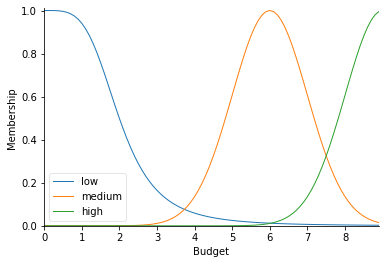

In [68]:
budget['low'] = fuzzy.gbellmf(budget.universe,2,2,0)
budget['medium'] = fuzzy.gaussmf(budget.universe,6,1)
budget['high'] = fuzzy.gaussmf(budget.universe,9,1)
budget.view()

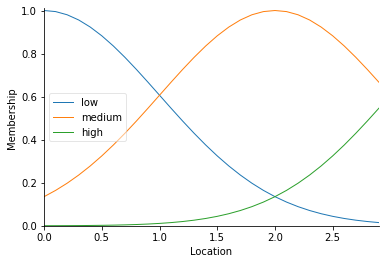

In [69]:
location['low'] = fuzzy.gaussmf(location.universe,0,1)
location['medium'] = fuzzy.gaussmf(location.universe,2,1)
location['high'] = fuzzy.gaussmf(location.universe,4,1)
location.view()

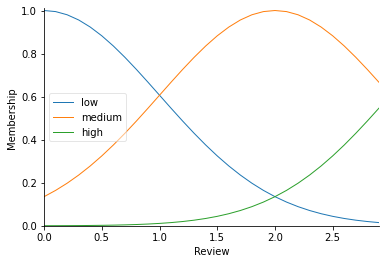

In [70]:
review['low'] = fuzzy.gaussmf(review.universe,0,1)
review['medium'] = fuzzy.gaussmf(review.universe,2,1)
review['high'] = fuzzy.gaussmf(review.universe,4,1)
review.view()

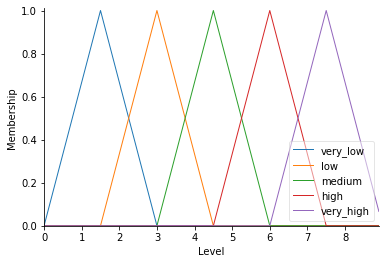

In [71]:
level['very_low'] = fuzzy.trimf(level.universe,[0,1.5,3])
level['low'] = fuzzy.trimf(level.universe,[1.5,3,4.5])
level['medium'] = fuzzy.trimf(level.universe,[3,4.5,6])
level['high'] = fuzzy.trimf(level.universe,[4.5,6,7.5])
level['very_high'] = fuzzy.trimf(level.universe,[6,7.5,9])
level.view()

In [72]:

#0 points
rule1 = ctrl.Rule(taste['low']&enviroment['low']&budget['low']&review['low']&location['low'], level['very_low'])

#1 points
rule1 = ctrl.Rule(taste['medium']&enviroment['low']&budget['low']&review['low']&location['low'], level['very_low'])
rule1 = ctrl.Rule(taste['low']&enviroment['medium']&budget['low']&review['low']&location['low'], level['very_low'])
rule1 = ctrl.Rule(taste['low']&enviroment['low']&budget['medium']&review['low']&location['low'], level['very_low'])
rule1 = ctrl.Rule(taste['low']&enviroment['low']&budget['low']&review['medium']&location['low'], level['very_low'])
rule1 = ctrl.Rule(taste['low']&enviroment['low']&budget['low']&review['low']&location['medium'], level['very_low'])

#2 (2 + 0)
rule1 = ctrl.Rule(taste['medium']&enviroment['medium']&budget['low']&review['low']&location['low'], level['very_low'])
rule1 = ctrl.Rule(taste['medium']&enviroment['low']&budget['medium']&review['low']&location['low'], level['very_low'])
rule1 = ctrl.Rule(taste['medium']&enviroment['low']&budget['low']&review['medium']&location['low'], level['very_low'])
rule1 = ctrl.Rule(taste['medium']&enviroment['low']&budget['low']&review['low']&location['medium'], level['very_low'])

rule1 = ctrl.Rule(taste['low']&enviroment['medium']&budget['medium']&review['low']&location['low'], level['very_low'])
rule1 = ctrl.Rule(taste['low']&enviroment['medium']&budget['low']&review['medium']&location['low'], level['very_low'])
rule1 = ctrl.Rule(taste['low']&enviroment['medium']&budget['low']&review['low']&location['medium'], level['very_low'])

rule1 = ctrl.Rule(taste['low']&enviroment['low']&budget['medium']&review['medium']&location['low'], level['very_low'])
rule1 = ctrl.Rule(taste['low']&enviroment['low']&budget['medium']&review['low']&location['medium'], level['very_low'])

rule1 = ctrl.Rule(taste['low']&enviroment['low']&budget['low']&review['medium']&location['medium'], level['very_low'])
 #2 (1+1)
rule1 = ctrl.Rule(taste['high']&enviroment['low']&budget['low']&review['low']&location['low'], level['very_low'])
rule1 = ctrl.Rule(taste['low']&enviroment['high']&budget['low']&review['low']&location['low'], level['very_low'])
rule1 = ctrl.Rule(taste['low']&enviroment['low']&budget['high']&review['low']&location['low'], level['very_low'])
rule1 = ctrl.Rule(taste['low']&enviroment['low']&budget['low']&review['high']&location['low'], level['very_low'])
rule1 = ctrl.Rule(taste['low']&enviroment['low']&budget['low']&review['low']&location['high'], level['very_low'])

#3 (2+1)
rule1 = ctrl.Rule(taste['high']&enviroment['medium']&budget['low']&review['low']&location['low'], level['very_low'])
rule1 = ctrl.Rule(taste['high']&enviroment['low']&budget['medium']&review['low']&location['low'], level['very_low'])
rule1 = ctrl.Rule(taste['high']&enviroment['low']&budget['low']&review['medium']&location['low'], level['very_low'])
rule1 = ctrl.Rule(taste['high']&enviroment['low']&budget['low']&review['low']&location['medium'], level['very_low'])

rule1 = ctrl.Rule(taste['medium']&enviroment['high']&budget['low']&review['low']&location['low'], level['very_low'])
rule1 = ctrl.Rule(taste['low']&enviroment['high']&budget['medium']&review['low']&location['low'], level['very_low'])
rule1 = ctrl.Rule(taste['low']&enviroment['high']&budget['low']&review['medium']&location['low'], level['very_low'])
rule1 = ctrl.Rule(taste['low']&enviroment['high']&budget['low']&review['low']&location['medium'], level['very_low'])

rule1 = ctrl.Rule(taste['medium']&enviroment['low']&budget['high']&review['low']&location['low'], level['very_low'])
rule1 = ctrl.Rule(taste['low']&enviroment['medium']&budget['high']&review['low']&location['low'], level['very_low'])
rule1 = ctrl.Rule(taste['low']&enviroment['low']&budget['high']&review['medium']&location['low'], level['very_low'])
rule1 = ctrl.Rule(taste['low']&enviroment['low']&budget['high']&review['low']&location['medium'], level['very_low'])

rule1 = ctrl.Rule(taste['medium']&enviroment['low']&budget['low']&review['high']&location['low'], level['very_low'])
rule1 = ctrl.Rule(taste['low']&enviroment['medium']&budget['low']&review['high']&location['low'], level['very_low'])
rule1 = ctrl.Rule(taste['low']&enviroment['low']&budget['medium']&review['high']&location['low'], level['very_low'])
rule1 = ctrl.Rule(taste['low']&enviroment['low']&budget['low']&review['high']&location['medium'], level['very_low'])

rule1 = ctrl.Rule(taste['medium']&enviroment['low']&budget['low']&review['low']&location['high'], level['very_low'])
rule1 = ctrl.Rule(taste['low']&enviroment['medium']&budget['low']&review['low']&location['high'], level['very_low'])
rule1 = ctrl.Rule(taste['low']&enviroment['low']&budget['medium']&review['low']&location['high'], level['very_low'])
rule1 = ctrl.Rule(taste['low']&enviroment['low']&budget['low']&review['medium']&location['high'], level['very_low'])

#4 (1 + 1 + 2)
rule1 = ctrl.Rule(taste['medium']&enviroment['medium']&budget['high']&review['low']&location['low'], level['very_low'])
rule1 = ctrl.Rule(taste['medium']&enviroment['medium']&budget['low']&review['high']&location['low'], level['very_low'])
rule1 = ctrl.Rule(taste['medium']&enviroment['medium']&budget['low']&review['low']&location['high'], level['very_low'])

rule1 = ctrl.Rule(taste['medium']&enviroment['high']&budget['medium']&review['low']&location['low'], level['very_low'])
rule1 = ctrl.Rule(taste['medium']&enviroment['low']&budget['medium']&review['high']&location['low'], level['very_low'])
rule1 = ctrl.Rule(taste['medium']&enviroment['low']&budget['medium']&review['low']&location['high'], level['very_low'])

rule1 = ctrl.Rule(taste['medium']&enviroment['high']&budget['low']&review['medium']&location['low'], level['very_low'])
rule1 = ctrl.Rule(taste['medium']&enviroment['low']&budget['high']&review['medium']&location['low'], level['very_low'])
rule1 = ctrl.Rule(taste['medium']&enviroment['low']&budget['low']&review['medium']&location['high'], level['very_low'])

rule1 = ctrl.Rule(taste['medium']&enviroment['high']&budget['low']&review['low']&location['medium'], level['very_low'])
rule1 = ctrl.Rule(taste['medium']&enviroment['low']&budget['high']&review['low']&location['medium'], level['very_low'])
rule1 = ctrl.Rule(taste['medium']&enviroment['low']&budget['low']&review['high']&location['medium'], level['very_low'])

rule1 = ctrl.Rule(taste['high']&enviroment['medium']&budget['medium']&review['low']&location['low'], level['very_low'])
rule1 = ctrl.Rule(taste['low']&enviroment['medium']&budget['medium']&review['high']&location['low'], level['very_low'])
rule1 = ctrl.Rule(taste['low']&enviroment['medium']&budget['medium']&review['low']&location['high'], level['very_low'])

rule1 = ctrl.Rule(taste['high']&enviroment['medium']&budget['low']&review['medium']&location['low'], level['very_low'])
rule1 = ctrl.Rule(taste['low']&enviroment['medium']&budget['high']&review['medium']&location['low'], level['very_low'])
rule1 = ctrl.Rule(taste['low']&enviroment['medium']&budget['low']&review['medium']&location['high'], level['very_low'])

rule1 = ctrl.Rule(taste['high']&enviroment['medium']&budget['low']&review['low']&location['medium'], level['very_low'])
rule1 = ctrl.Rule(taste['low']&enviroment['medium']&budget['high']&review['low']&location['medium'], level['very_low'])
rule1 = ctrl.Rule(taste['low']&enviroment['medium']&budget['low']&review['high']&location['medium'], level['very_low'])

rule1 = ctrl.Rule(taste['high']&enviroment['low']&budget['medium']&review['medium']&location['low'], level['very_low'])
rule1 = ctrl.Rule(taste['low']&enviroment['high']&budget['medium']&review['medium']&location['low'], level['very_low'])
rule1 = ctrl.Rule(taste['low']&enviroment['low']&budget['medium']&review['medium']&location['high'], level['very_low'])

rule1 = ctrl.Rule(taste['high']&enviroment['low']&budget['medium']&review['low']&location['medium'], level['very_low'])
rule1 = ctrl.Rule(taste['low']&enviroment['high']&budget['medium']&review['low']&location['medium'], level['very_low'])
rule1 = ctrl.Rule(taste['low']&enviroment['low']&budget['medium']&review['high']&location['medium'], level['very_low'])

rule1 = ctrl.Rule(taste['high']&enviroment['low']&budget['low']&review['medium']&location['medium'], level['very_low'])
rule1 = ctrl.Rule(taste['low']&enviroment['high']&budget['low']&review['medium']&location['medium'], level['very_low'])
rule1 = ctrl.Rule(taste['low']&enviroment['low']&budget['high']&review['medium']&location['medium'], level['very_low'])

#4 (2 + 2)
rule1 = ctrl.Rule(taste['high']&enviroment['high']&budget['low']&review['low']&location['low'], level['very_low'])
rule1 = ctrl.Rule(taste['high']&enviroment['low']&budget['high']&review['low']&location['low'], level['very_low'])
rule1 = ctrl.Rule(taste['high']&enviroment['low']&budget['low']&review['high']&location['low'], level['very_low'])
rule1 = ctrl.Rule(taste['high']&enviroment['low']&budget['low']&review['low']&location['high'], level['very_low'])

rule1 = ctrl.Rule(taste['high']&enviroment['high']&budget['low']&review['low']&location['low'], level['very_low'])
rule1 = ctrl.Rule(taste['low']&enviroment['high']&budget['high']&review['low']&location['low'], level['very_low'])
rule1 = ctrl.Rule(taste['low']&enviroment['high']&budget['low']&review['high']&location['low'], level['very_low'])
rule1 = ctrl.Rule(taste['low']&enviroment['high']&budget['low']&review['low']&location['high'], level['very_low'])

rule1 = ctrl.Rule(taste['high']&enviroment['low']&budget['high']&review['low']&location['low'], level['very_low'])
rule1 = ctrl.Rule(taste['low']&enviroment['high']&budget['high']&review['low']&location['low'], level['very_low'])
rule1 = ctrl.Rule(taste['low']&enviroment['low']&budget['high']&review['high']&location['low'], level['very_low'])
rule1 = ctrl.Rule(taste['low']&enviroment['low']&budget['high']&review['low']&location['high'], level['very_low'])

rule1 = ctrl.Rule(taste['high']&enviroment['low']&budget['low']&review['high']&location['low'], level['very_low'])
rule1 = ctrl.Rule(taste['low']&enviroment['high']&budget['low']&review['high']&location['low'], level['very_low'])
rule1 = ctrl.Rule(taste['low']&enviroment['low']&budget['high']&review['high']&location['low'], level['very_low'])
rule1 = ctrl.Rule(taste['low']&enviroment['low']&budget['low']&review['high']&location['high'], level['very_low'])

rule1 = ctrl.Rule(taste['high']&enviroment['low']&budget['low']&review['low']&location['high'], level['very_low'])
rule1 = ctrl.Rule(taste['low']&enviroment['high']&budget['low']&review['low']&location['high'], level['very_low'])
rule1 = ctrl.Rule(taste['low']&enviroment['low']&budget['high']&review['low']&location['high'], level['very_low'])
rule1 = ctrl.Rule(taste['low']&enviroment['low']&budget['low']&review['high']&location['high'], level['very_low'])

#5 (2 + 2 + 1)
rule1 = ctrl.Rule(taste['high']&enviroment['high']&budget['low']&review['low']&location['low'], level['very_low'])
rule1 = ctrl.Rule(taste['high']&enviroment['high']&budget['low']&review['low']&location['low'], level['very_low'])
rule1 = ctrl.Rule(taste['high']&enviroment['high']&budget['low']&review['low']&location['low'], level['very_low'])

rule1 = ctrl.Rule(taste['high']&enviroment['low']&budget['high']&review['low']&location['low'], level['very_low'])
rule1 = ctrl.Rule(taste['high']&enviroment['low']&budget['low']&review['high']&location['low'], level['very_low'])
rule1 = ctrl.Rule(taste['high']&enviroment['low']&budget['low']&review['low']&location['high'], level['very_low'])

rule1 = ctrl.Rule(taste['high']&enviroment['high']&budget['low']&review['low']&location['low'], level['very_low'])
rule1 = ctrl.Rule(taste['low']&enviroment['high']&budget['high']&review['low']&location['low'], level['very_low'])
rule1 = ctrl.Rule(taste['low']&enviroment['high']&budget['low']&review['high']&location['low'], level['very_low'])
rule1 = ctrl.Rule(taste['low']&enviroment['high']&budget['low']&review['low']&location['high'], level['very_low'])

rule1 = ctrl.Rule(taste['high']&enviroment['low']&budget['high']&review['low']&location['low'], level['very_low'])
rule1 = ctrl.Rule(taste['low']&enviroment['high']&budget['high']&review['low']&location['low'], level['very_low'])
rule1 = ctrl.Rule(taste['low']&enviroment['low']&budget['high']&review['high']&location['low'], level['very_low'])
rule1 = ctrl.Rule(taste['low']&enviroment['low']&budget['high']&review['low']&location['high'], level['very_low'])

rule1 = ctrl.Rule(taste['high']&enviroment['low']&budget['low']&review['high']&location['low'], level['very_low'])
rule1 = ctrl.Rule(taste['low']&enviroment['high']&budget['low']&review['high']&location['low'], level['very_low'])
rule1 = ctrl.Rule(taste['low']&enviroment['low']&budget['high']&review['high']&location['low'], level['very_low'])
rule1 = ctrl.Rule(taste['low']&enviroment['low']&budget['low']&review['high']&location['high'], level['very_low'])

rule1 = ctrl.Rule(taste['high']&enviroment['low']&budget['low']&review['low']&location['high'], level['very_low'])
rule1 = ctrl.Rule(taste['low']&enviroment['high']&budget['low']&review['low']&location['high'], level['very_low'])
rule1 = ctrl.Rule(taste['low']&enviroment['low']&budget['high']&review['low']&location['high'], level['very_low'])
rule1 = ctrl.Rule(taste['low']&enviroment['low']&budget['low']&review['high']&location['high'], level['very_low'])

#6 (2 + 2 + 2)




In [73]:
#clinical_decision.input['Glycaemia'] = 100
#clinical_decision.input['Sirolimus'] = 12

#clinical_decision.compute()
#print(clinical_decision.output['Proteinuria'])
#proteinuria.view(sim = clinical_decision)